In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Functional Approach

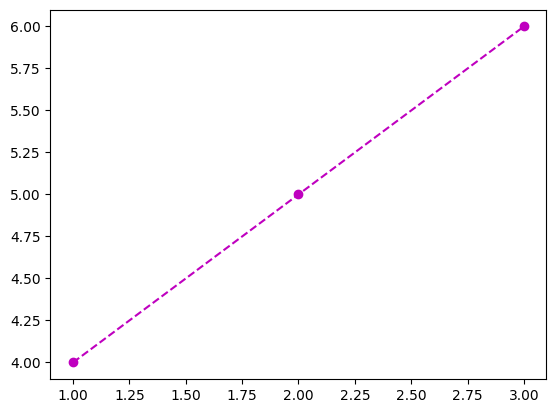

In [22]:
#2 ways to create plots
#Functional approach

plt.figure()
plt.plot([1,2,3], [4,5,6], 'mo--')

# Object-oriented approach

It is reccomended to stick to this form. It provides more flexibility and is the "correct" approach.


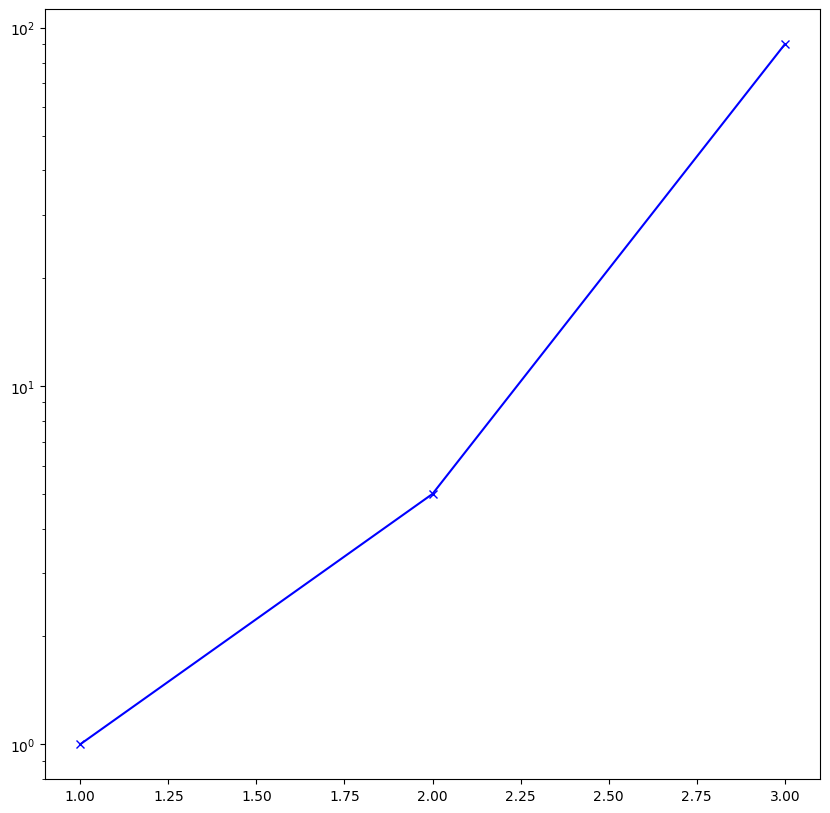

In [26]:
fig, axes = plt.subplots(figsize=(10,10))
axes.semilogy([1,2,3],[1,5,90], 'bx-') #log y axis

# Exercise 

Use your knoweldge of python and appropriate ChatGPT prompts to figure out how to do the following. 

## 1. Change the xlabels, ylabels, fontsizes of the ticklabels
## 2. Plot two lines on the same plot
## 3. Use a legend, Change the location of the legend
## 4. Plot 100 different lines, and use a graded color scheme to color each line

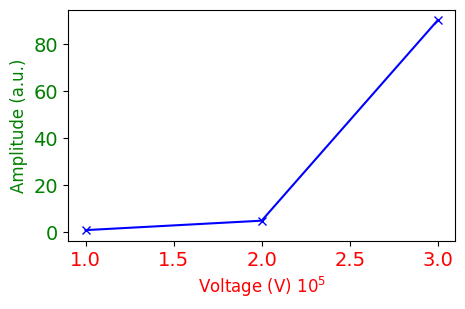

In [45]:
#1.

fig, axes = plt.subplots(figsize=(5,3))
axes.plot([1,2,3],[1,5,90], 'bx-')

#Let's add axes labels
axes.set_xlabel('Voltage (V) $10^5$', fontsize = 12, color = 'red')
axes.set_ylabel('Amplitude (a.u.)', fontsize=12, color ='green')

#Let's change the fontsize of the ticks
axes.tick_params(axis='x', labelsize=14, labelcolor='red')
axes.tick_params(axis='y', labelsize=14, labelcolor='green')

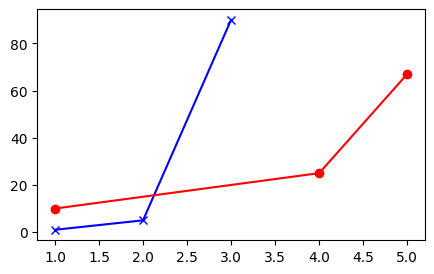

In [30]:
#2. Plot two lines on the same plot
fig, axes = plt.subplots(figsize=(5,3))
axes.plot([1,2,3],[1,5,90], 'bx-')
axes.plot([1,4,5], [10,25,67], 'ro-')

Text(0.5, 0.98, 'My whole figure')

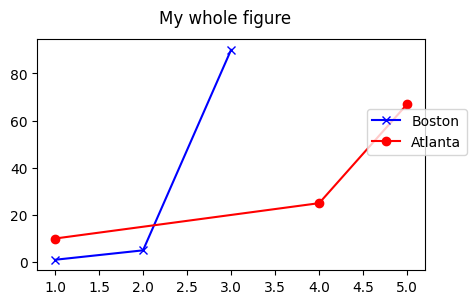

In [48]:
# 3. Add a legend, change the location of the legend
fig, axes = plt.subplots(figsize=(5,3))
axes.plot([1,2,3],[1,5,90], 'bx-', label = 'Boston')
axes.plot([1,4,5], [10,25,67], 'ro-', label ='Atlanta')
axes.legend(loc = [.85,0.5])
fig.suptitle('My whole figure')

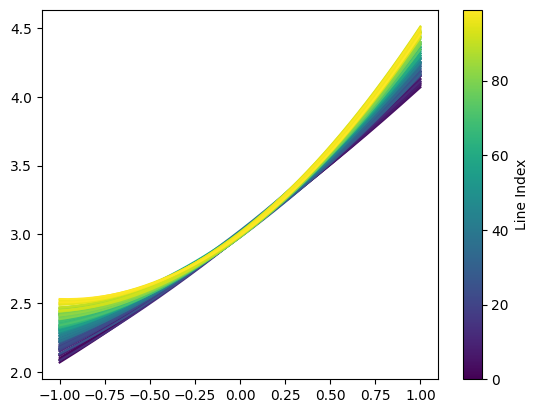

In [49]:
#4. Plot 100 lines, and color them by index

import matplotlib.cm as cm
import matplotlib.colors as mcolors

def return_poly_func(xvec, *parms):
    a,b,c = parms
    return a*xvec**2 + b*xvec + c

num_lines = 100

a = np.linspace(0.1,0.5,num_lines)
b = np.random.normal(loc=1.0, scale=0.02, size = num_lines)
c = np.random.normal(loc=3.0, scale=0.01, size = num_lines)

xvec = np.linspace(-1,1,128)
yvecs = np.zeros(shape=(num_lines, len(xvec)))

for ind in range(num_lines):
    yvecs[ind,:] = return_poly_func(xvec, *[a[ind],b[ind],c[ind]])

fig, axes = plt.subplots()

# Create a colormap and normalize it
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=99)

for ind in range(num_lines):
    axes.plot(xvec,yvecs[ind], color=cmap(norm(ind)))

#Add the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=axes)
cbar.set_label('Line Index')


# Image Plots

We can plot images using imshow()

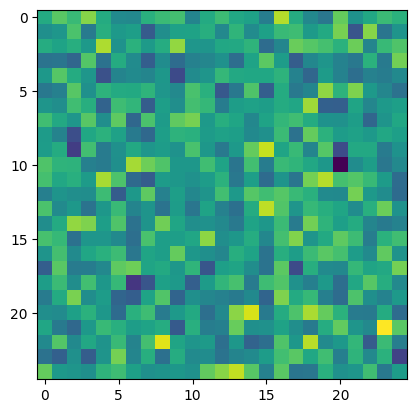

In [52]:
my_arr = np.random.normal(size=(25,25))
fig, axes = plt.subplots()
axes.imshow(my_arr)


# Exercise

1. Make a data array with increasing values along the diagonal, and plot it
2. Add a colorbar to this plot, and change the colormap
3. Add another imshow plot on top that is overlaid

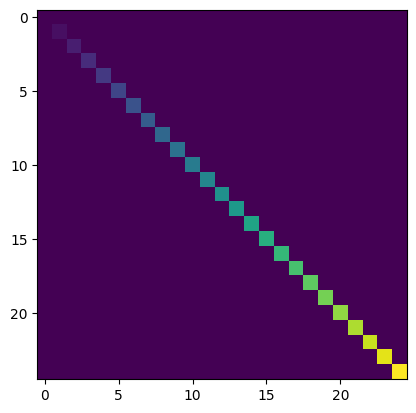

In [55]:
#1. 
#make an array with diagonal elements increasing

my_arr = np.zeros(shape=(25,25))
for xind in range(my_arr.shape[0]):
    for yind in range(my_arr.shape[1]):
        if xind==yind:
            my_arr[xind,yind] = 1.00*xind
            
fig, axes = plt.subplots()
axes.imshow(my_arr)

Text(0, 0.5, 'Diagonal Value')

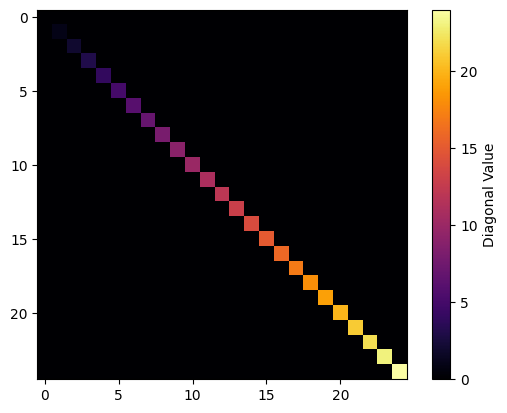

In [62]:
#Let's add a colorbar to the plot. 

fig, axes = plt.subplots()
im1 = axes.imshow(my_arr, cmap = 'inferno')
cb = plt.colorbar(im1)
cb.ax.set_ylabel('Diagonal Value')

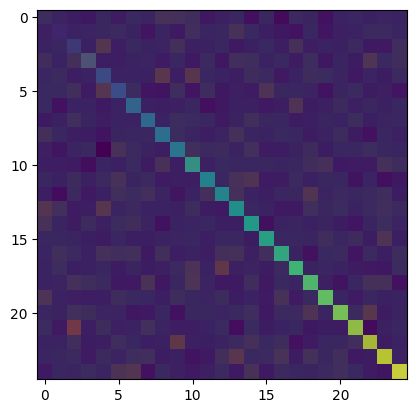

In [65]:
new_arr = np.random.normal(size=(25,25))

fig, axes = plt.subplots()
im1 = axes.imshow(my_arr)
im2 = axes.imshow(new_arr, alpha = 0.25)


# Multiple Plots



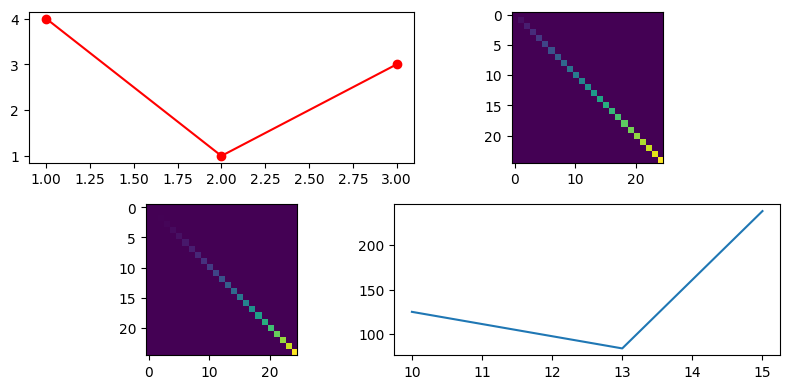

In [67]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8,4))

axes[0,0].plot([1,2,3], [4,1,3], 'ro-')
axes[0,1].imshow(my_arr)
axes[1,0].imshow(my_arr**2)
axes[1,1].plot([10,13,15], [125,84,238])

fig.tight_layout()

In [11]:
#Exercise
# Add colorbars to the plots above. 
# For the line plots, add multiple lines (e.g., 100) and add a colorbar which indexes them.
# Plot 100 images in a 10x10 plot

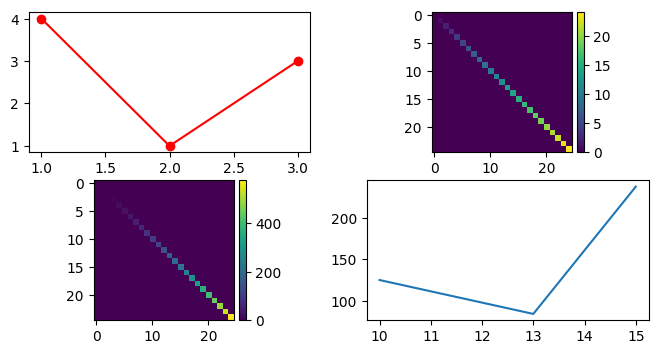

In [69]:
#Add colorbars 
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8,4))
axes[0,0].plot([1,2,3], [4,1,3], 'ro-')
im1 = axes[0,1].imshow(my_arr)
im2 = axes[1,0].imshow(my_arr**2)
axes[1,1].plot([10,13,15], [125,84,238])

#add colorbar to first imshow plot
divider = make_axes_locatable(axes[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

#add colorbar to the second imshow plot
divider = make_axes_locatable(axes[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

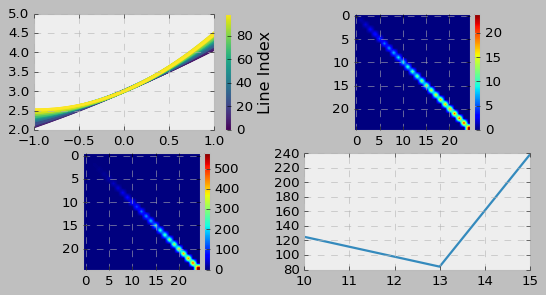

In [98]:
#For the line plots, add multiple lines (e.g., 100) and add a colorbar which indexes them.

#Add colorbars 
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8,4))

im1 = axes[0,1].imshow(my_arr)
im2 = axes[1,0].imshow(my_arr**2)
axes[1,1].plot([10,13,15], [125,84,238])

#add colorbar to first imshow plot
divider = make_axes_locatable(axes[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

#add colorbar to the second imshow plot
divider = make_axes_locatable(axes[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

#add the lines to the first line plot
# Create a colormap and normalize it
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=99)
for ind in range(num_lines):
    axes[0,0].plot(xvec,yvecs[ind], color=cmap(norm(ind)))

#Add the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=axes[0,0])
cbar.set_label('Line Index')

Text(0.5, 1.05, '100 images')

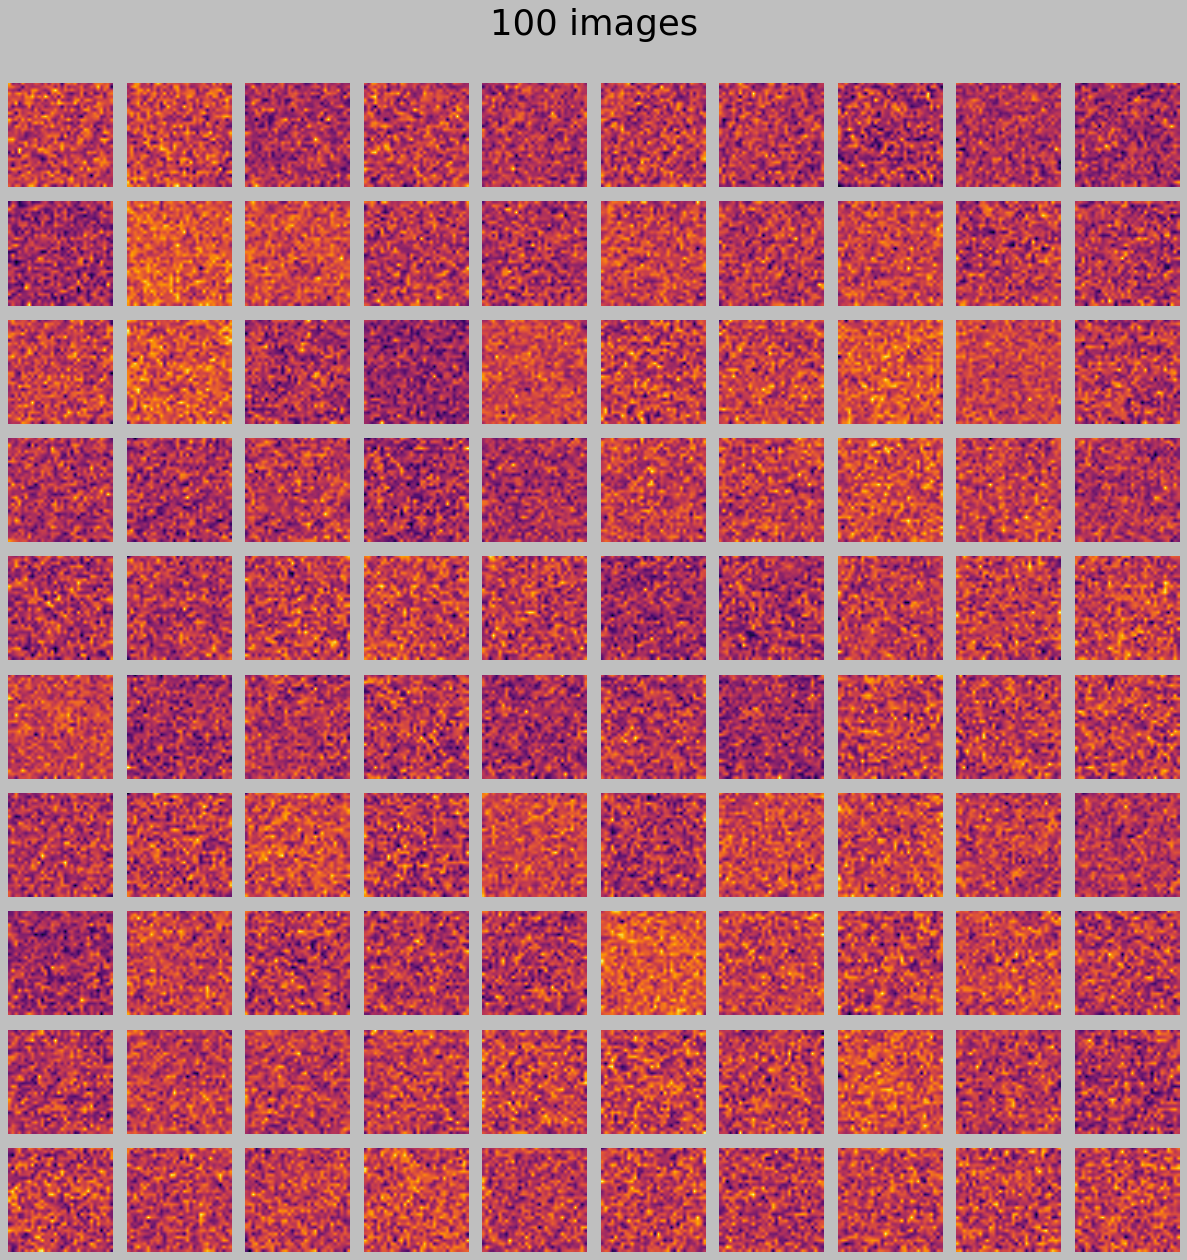

In [97]:
# Plot 100 images in a 10x10 plot
fig, axes = plt.subplots(nrows=10,ncols=10, figsize=(15,15))
for ind, ax in enumerate(axes.flat):
    ax.imshow(np.random.normal(size=(32,32)), cmap = 'inferno')
    ax.axis('off')
    
fig.tight_layout()
fig.suptitle('100 images', fontsize = 32, y=1.05)

# Other Plots
## Violin plots, histograms, 3D Plots

Use ChatGPT to generate histograms and violinplots.